In [1]:
import pandas as pd

In [2]:
filepath= r'D:\Academics\6th semester\Machine Learning\LAB\Lab-1\advertising.csv'

In [3]:
df=pd.read_csv(filepath)

In [4]:
df.info

<bound method DataFrame.info of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]>

In [5]:
df.head()

TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9

preprocessing

In [6]:
#checking null values
df.isnull().sum()*100/df.shape[0]

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

In [7]:
df=df.drop(columns=['Radio','Newspaper'])

In [8]:
df.head()

TV  Sales
0  230.1   22.1
1   44.5   10.4
2   17.2   12.0
3  151.5   16.5
4  180.8   17.9

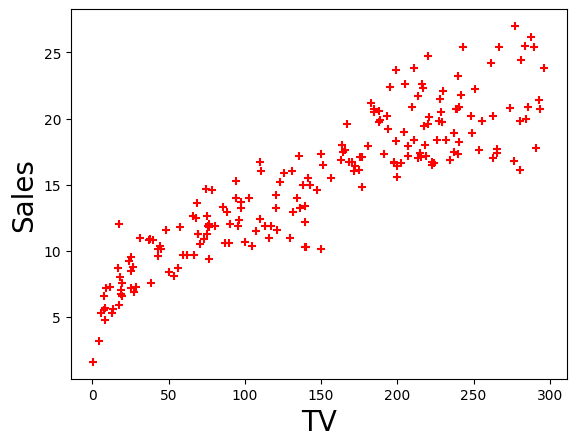

In [9]:
import matplotlib.pyplot as plt
plt.xlabel('TV',fontsize=20)
plt.ylabel('Sales',fontsize=20)
plt.scatter(df.TV,df.Sales,color='red',marker='+')

In [9]:
#model building
X=df['TV']
y=df['Sales']

In [10]:
#split the dataset
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size  =0.7, test_size=0.3,random_state=100)

In [12]:
#build the linear model
from sklearn import linear_model

In [13]:
reg=linear_model.LinearRegression()

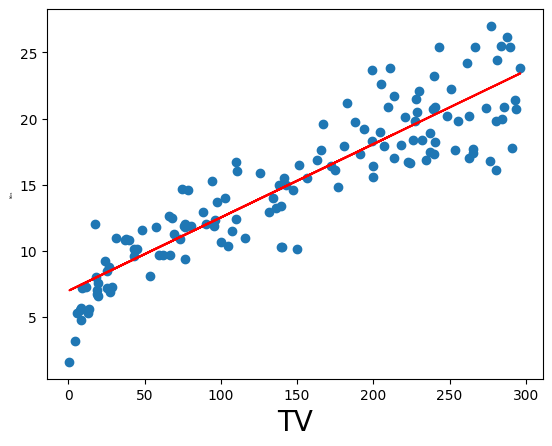

In [14]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

reg = LinearRegression()
reg.fit(df[['TV']], df.Sales)
line_y = reg.intercept_ + reg.coef_[0] * X_train
# Visualize the linear regression line
plt.xlabel('TV', fontsize=20)
plt.ylabel('Sales', fontsize=2)
plt.scatter(X_train, y_train)
plt.plot(X_train, reg.intercept_ + reg.coef_[0] * X_train, 'r')
plt.show()


#0.8 in R-square near to 1 so high R-square value is good model

In [15]:
import numpy as np

m = 0
c = 0

L = 0.00003  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent

n = float(len(X)) # Number of elements in X

# Performing Gradient Descent 
for i in range(epochs): 
    y_pred = m*X + c  # The current predicted value of Y
    cost = (1/n)*sum([val**2 for val in (y-y_pred)])
    D_m = (-2/n) * sum(X * (y - y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(y - y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    print (m, c,  cost)

In [ ]:
# ... (previous code)

def gradient_descent(x, y):
    m_c = b_c = 0
    iterations = 1000000
    n = len(x)
    lr = 0.00003
    for i in range(iterations):
        y_pred = m_c * x + b_c
        cost = (1/n) * sum([val**2 for val in (y - y_pred)])
        md = -(2/n) * sum(x * (y - y_pred))
        bd = -(2/n) * sum(y - y_pred)
        m_c = m_c - lr * md
        b_c = b_c - lr * bd
        print('m {}, b {}, cost {} iteration {}'.format(m_c, b_c, cost, i))

gradient_descent(X, y)
print(m_c,b_c)

m 0.15789662699999996, b 0.0009078300000000003, cost 256.71195 iteration 0
m 0.041465826522832344, b 0.0004225546436611505, cost 147.5836541415911 iteration 1
m 0.12731867235348368, b 0.0009645249625935166, cost 88.24718374525385 iteration 2
m 0.0640115383267818, b 0.0007490217383235336, cost 55.984009493217464 iteration 3
m 0.11069203801211958, b 0.0010920617995542853, cost 38.441391425515405 iteration 4
m 0.0762698211547205, b 0.0010232402358824864, cost 28.902777498472624 iteration 5
m 0.10165115139924355, b 0.0012581145308397542, cost 23.716178639090018 iteration 6
m 0.08293452295103942, b 0.0012690466781905077, cost 20.895899790948874 iteration 7
m 0.09673486141497632, b 0.0014451065599281232, cost 19.362259504222678 iteration 8
m 0.08655782842178479, b 0.0014994017019578283, cost 18.528202868676612 iteration 9
m 0.09406123728374043, b 0.0016434809687130934, cost 18.074530672648606 iteration 10
m 0.08852743628471306, b 0.0017213523908573064, cost 17.827684812885508 iteration 11
m 

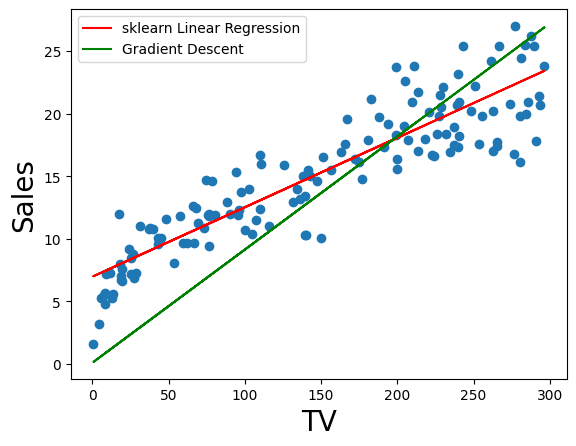

Mean Squared Error (Gradient Descent): 17.169256552315716


In [70]:
# ... (previous code)

# Comparison with sklearn
plt.xlabel('TV', fontsize=20)
plt.ylabel('Sales', fontsize=20)
plt.scatter(X_train, y_train)
plt.plot(X_train, reg.intercept_ + reg.coef_[0] * X_train, 'r', label='sklearn Linear Regression')
plt.plot(X_train, c + m * X_train, 'g', label='Gradient Descent')
plt.legend()
plt.show()

# Calculate mean squared error for gradient descent
y_pred_gradient_descent = m * X + c

mse_gradient_descent = mean_squared_error(y, y_pred_gradient_descent)
print(f'Mean Squared Error (Gradient Descent): {mse_gradient_descent}')


In [71]:
from sklearn.metrics import mean_squared_error

# Assuming reg is your linear regression model
y_pred = reg.predict(X_test.values.reshape(-1, 1))

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Squared Error (Linear Regression): {mse}')


Mean Squared Error (Linear Regression): 3.892186648675427


C:\Users\emoha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
